<h1>Sweta Barnwal</h1>

<h1>The Spark Foundation || GRIP NOV20 || TASK-5</h1>

# Exploratory Data Analysis-IPL

In [2]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline

In [4]:
df=pd.read_csv('deliveries.csv')
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [6]:
pd.DataFrame(df.isnull().sum(), columns= ['Number of missing values'])

,Number of missing values
match_id,0
inning,0
batting_team,0
bowling_team,0
over,0
ball,0
batsman,0
non_striker,0
bowler,0
is_super_over,0


In [7]:
x=df[['batsman','batsman_runs']]
batsmen=x.groupby('batsman').batsman_runs.sum().sort_values(ascending = False).reset_index()
batsmen[:10]

,batsman,batsman_runs
0,V Kohli,5434
1,SK Raina,5415
2,RG Sharma,4914
3,DA Warner,4741
4,S Dhawan,4632
5,CH Gayle,4560
6,MS Dhoni,4477
7,RV Uthappa,4446
8,AB de Villiers,4428
9,G Gambhir,4223


Text(0.5, 1.0, 'Top 10 Batsmen in IPL')

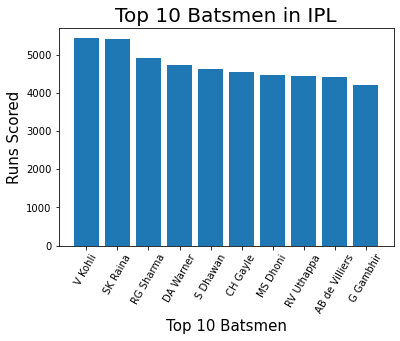

In [8]:
plt.bar(batsmen['batsman'][:10], batsmen['batsman_runs'][:10])
plt.xticks(rotation=60)
plt.xlabel('Top 10 Batsmen',size=15)
plt.ylabel('Runs Scored',size=15)
plt.title('Top 10 Batsmen in IPL',size=20)

In [9]:
y=df[['match_id','batsman','batsman_runs']]
innings=y.groupby(['match_id', 'batsman']).batsman_runs.sum().sort_values(ascending = False).reset_index()
innings[:10]

,match_id,batsman,batsman_runs
0,411,CH Gayle,175
1,60,BB McCullum,158
2,562,AB de Villiers,133
3,7935,RR Pant,130
4,620,AB de Villiers,129
5,372,CH Gayle,128
6,206,M Vijay,127
7,36,DA Warner,126
8,516,V Sehwag,122
9,7953,SR Watson,121


In [10]:
x = df[df['dismissal_kind'] != 'run out']
x=x[['bowler','dismissal_kind']]
bowlers=x.groupby(['bowler','dismissal_kind']).first()
bowlers[:10]

Empty DataFrame
Columns: []
Index: [(A Ashish Reddy, bowled), (A Ashish Reddy, caught), (A Ashish Reddy, caught and bowled), (A Ashish Reddy, lbw), (A Chandila, caught), (A Chandila, caught and bowled), (A Chandila, stumped), (A Choudhary, caught), (A Flintoff, caught), (A Flintoff, caught and bowled)]

In [11]:
dismissal=df['dismissal_kind'].value_counts().reset_index()
dismissal

,index,dismissal_kind
0,caught,5348
1,bowled,1581
2,run out,852
3,lbw,540
4,stumped,278
5,caught and bowled,211
6,retired hurt,12
7,hit wicket,10
8,obstructing the field,2


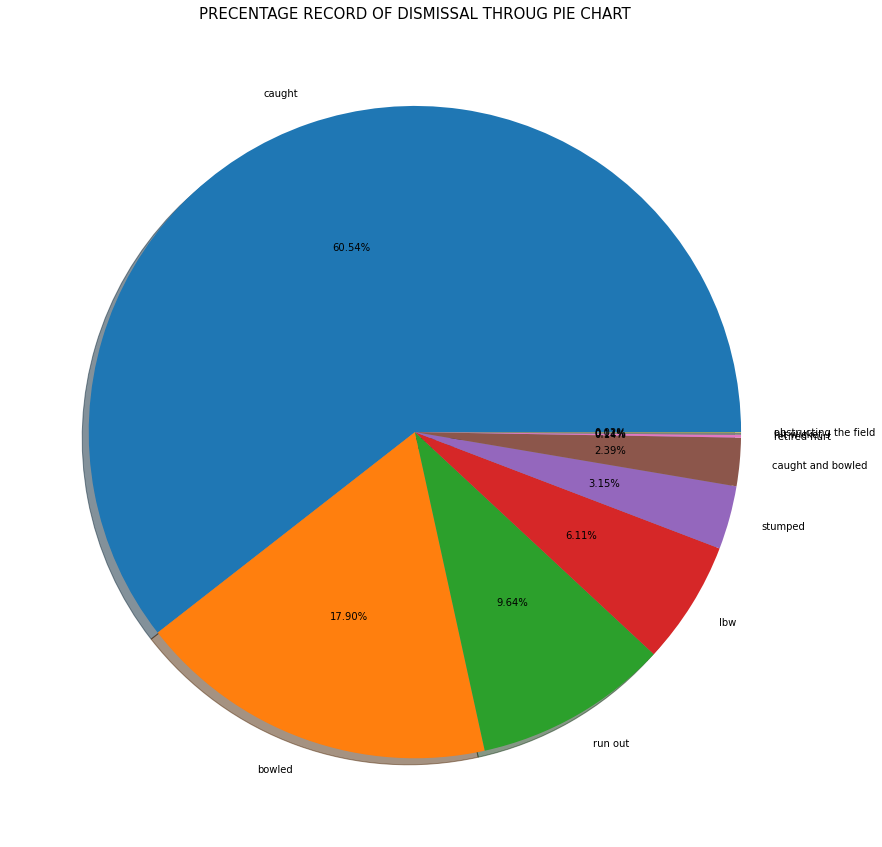

In [12]:
plt.figure(figsize=(15,15))
plt.pie(dismissal['dismissal_kind'],labels=dismissal['index'],autopct='%0.2f%%',shadow=True,counterclock=True)
plt.title('PRECENTAGE RECORD OF DISMISSAL THROUG PIE CHART',fontsize=15)
plt.show()

In [13]:
z=df[['bowler','dismissal_kind']]
top_bowlers=z.groupby('bowler').dismissal_kind.count().sort_values(ascending = False).reset_index()
top_bowlers[:10]

,bowler,dismissal_kind
0,SL Malinga,188
1,DJ Bravo,168
2,A Mishra,165
3,Harbhajan Singh,161
4,PP Chawla,156
5,B Kumar,141
6,R Ashwin,138
7,SP Narine,137
8,UT Yadav,136
9,R Vinay Kumar,127


In [14]:
a=df[['match_id','bowler','dismissal_kind']]
ings_wkts=a.groupby(['match_id', 'bowler']).dismissal_kind.count().reset_index()
top_bowlers = ings_wkts.sort_values(by='dismissal_kind', ascending=False)[:10]
top_bowlers.rename(columns = {'dismissal_kind':'Wickets'}, inplace = True)
top_bowlers

,match_id,bowler,Wickets
5251,440,DJG Sammy,6
7314,616,A Zampa,6
995,83,Sohail Tanvir,6
7215,608,AD Russell,6
8499,11310,A Joseph,6
1401,119,A Kumble,5
1161,98,A Mishra,5
8036,7932,TG Southee,5
1080,91,L Balaji,5
3542,294,BJ Hodge,5


In [15]:
bowling_ings_runs = df.groupby(['match_id', 'bowler']).apply(lambda x: x['total_runs'].sum()).reset_index(name='runs_conceded')
top_performances = pd.merge(top_bowlers, bowling_ings_runs, left_on=['match_id', 'bowler'], right_on=['match_id', 'bowler'])
top_performances['runs_per_wicket'] = top_performances['runs_conceded'] / top_performances['Wickets']
top_performances

,match_id,bowler,Wickets,runs_conceded,runs_per_wicket
0,440,DJG Sammy,6,23,3.833333
1,616,A Zampa,6,19,3.166667
2,83,Sohail Tanvir,6,15,2.500000
3,608,AD Russell,6,25,4.166667
4,11310,A Joseph,6,18,3.000000
5,119,A Kumble,5,6,1.200000
6,98,A Mishra,5,17,3.400000
7,7932,TG Southee,5,33,6.600000
8,91,L Balaji,5,25,5.000000
9,294,BJ Hodge,5,13,2.600000


In [16]:
match_bowling = df.groupby(['match_id', 'inning', 'bowling_team', 'bowler', 'over'])
bowler_runs = match_bowling['total_runs', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs'].sum().reset_index()

<ipython-input-16-38cd4f9d4bc4>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  bowler_runs = match_bowling['total_runs', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs'].sum().reset_index()


In [17]:
bowler_runs['extras'] = bowler_runs['wide_runs'] + bowler_runs['noball_runs']
bowler_runs['runs'] = bowler_runs['total_runs'] - bowler_runs['bye_runs'] + bowler_runs['legbye_runs']

In [18]:
bowler_runs = bowler_runs.drop(['bye_runs', 'legbye_runs', 'total_runs'], axis=1)
bowler_runs.head()

,match_id,inning,bowling_team,bowler,over,wide_runs,noball_runs,extras,runs
0,1,1,Royal Challengers Bangalore,A Choudhary,2,0,1,1,16
1,1,1,Royal Challengers Bangalore,A Choudhary,10,0,0,0,4
2,1,1,Royal Challengers Bangalore,A Choudhary,13,1,0,1,18
3,1,1,Royal Challengers Bangalore,A Choudhary,18,2,0,2,17
4,1,1,Royal Challengers Bangalore,S Aravind,5,0,0,0,9


In [19]:
bowler_runs.groupby(['match_id', 'bowler', 'bowling_team'])['runs'].sum().reset_index().head()

,match_id,bowler,bowling_team,runs
0,1,A Choudhary,Royal Challengers Bangalore,55
1,1,A Nehra,Sunrisers Hyderabad,42
2,1,B Kumar,Sunrisers Hyderabad,29
3,1,BCJ Cutting,Sunrisers Hyderabad,35
4,1,Bipul Sharma,Sunrisers Hyderabad,4


In [20]:
bowler_runs.groupby(['match_id', 'bowler', 'bowling_team'])['over'].count().reset_index().head()

,match_id,bowler,bowling_team,over
0,1,A Choudhary,Royal Challengers Bangalore,4
1,1,A Nehra,Sunrisers Hyderabad,4
2,1,B Kumar,Sunrisers Hyderabad,4
3,1,BCJ Cutting,Sunrisers Hyderabad,4
4,1,Bipul Sharma,Sunrisers Hyderabad,1


In [21]:
bowler_runs.head()

,match_id,inning,bowling_team,bowler,over,wide_runs,noball_runs,extras,runs
0,1,1,Royal Challengers Bangalore,A Choudhary,2,0,1,1,16
1,1,1,Royal Challengers Bangalore,A Choudhary,10,0,0,0,4
2,1,1,Royal Challengers Bangalore,A Choudhary,13,1,0,1,18
3,1,1,Royal Challengers Bangalore,A Choudhary,18,2,0,2,17
4,1,1,Royal Challengers Bangalore,S Aravind,5,0,0,0,9


In [22]:
batsman_detail = df.groupby(['match_id', 'inning', 'batting_team', 'batsman'])
batsmen = batsman_detail['batsman_runs'].sum().reset_index()
batsmen.head()

,match_id,inning,batting_team,batsman,batsman_runs
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16
1,1,1,Sunrisers Hyderabad,DA Warner,14
2,1,1,Sunrisers Hyderabad,DJ Hooda,16
3,1,1,Sunrisers Hyderabad,MC Henriques,52
4,1,1,Sunrisers Hyderabad,S Dhawan,40


In [23]:
balls_faced = df[df["wide_runs"] == 0]
balls_faced = balls_faced.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
balls_faced.columns = ["match_id", "inning", "batsman", "balls_faced"]
batsmen = batsmen.merge(balls_faced, left_on=["match_id", "inning", "batsman"],
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen.head()

,match_id,inning,batting_team,batsman,batsman_runs,balls_faced
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16,6.0
1,1,1,Sunrisers Hyderabad,DA Warner,14,8.0
2,1,1,Sunrisers Hyderabad,DJ Hooda,16,12.0
3,1,1,Sunrisers Hyderabad,MC Henriques,52,37.0
4,1,1,Sunrisers Hyderabad,S Dhawan,40,31.0


In [24]:
fours = df[ df["batsman_runs"] == 4]
sixes = df[ df["batsman_runs"] == 6]

fours_by_batsman = fours.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()
sixes_by_batsman = sixes.groupby(["match_id", "inning", "batsman"])["batsman_runs"].count().reset_index()

In [25]:
fours_by_batsman.head()

,match_id,inning,batsman,batsman_runs
0,1,1,DA Warner,2
1,1,1,MC Henriques,3
2,1,1,S Dhawan,5
3,1,1,Yuvraj Singh,7
4,1,2,CH Gayle,2


In [26]:
fours_by_batsman.columns = ["match_id", "inning", "batsman", "4s"]
sixes_by_batsman.columns = ["match_id", "inning", "batsman", "6s"]

In [27]:
batsmen = batsmen.merge(fours_by_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen = batsmen.merge(sixes_by_batsman, left_on=["match_id", "inning", "batsman"], 
                        right_on=["match_id", "inning", "batsman"], how="left")
batsmen['SR'] = np.round(batsmen['batsman_runs'] / batsmen['balls_faced'] * 100, 2)

In [28]:
batsmen.head()

,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR
0,1,1,Sunrisers Hyderabad,BCJ Cutting,16,6.0,NaN,2.0,266.67
1,1,1,Sunrisers Hyderabad,DA Warner,14,8.0,2.0,1.0,175.00
2,1,1,Sunrisers Hyderabad,DJ Hooda,16,12.0,NaN,1.0,133.33
3,1,1,Sunrisers Hyderabad,MC Henriques,52,37.0,3.0,2.0,140.54
4,1,1,Sunrisers Hyderabad,S Dhawan,40,31.0,5.0,NaN,129.03


In [29]:
na_cols = ["batsman_runs", "4s", "6s", "SR"]
for col in na_cols:
    batsmen[col] = batsmen[col].fillna(0)

In [30]:
team_score = batsmen[batsmen['batting_team'] == "Mumbai Indians"].reset_index()
team_score.head()

,index,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR
0,17,2,1,Mumbai Indians,AT Rayudu,10,12.0,0.0,0.0,83.33
1,18,2,1,Mumbai Indians,HH Pandya,35,15.0,1.0,4.0,233.33
2,19,2,1,Mumbai Indians,JC Buttler,38,19.0,3.0,3.0,200.00
3,20,2,1,Mumbai Indians,KA Pollard,27,17.0,3.0,1.0,158.82
4,21,2,1,Mumbai Indians,KH Pandya,3,5.0,0.0,0.0,60.00


In [31]:
scores = team_score.groupby(['match_id'])['batsman_runs'].sum().reset_index()
scores.head()

,match_id,batsman_runs
0,2,176
1,7,168
2,10,155
3,12,132
4,16,164


In [32]:
from sklearn.preprocessing import LabelEncoder

ftr_list = ['batsman']
encoder = LabelEncoder()
for ftr in ftr_list:
    team_score[ftr] = encoder.fit_transform(team_score[ftr])
    print(encoder.classes_)

team_score.head()

['A Dananjaya' 'A Joseph' 'A Nehra' 'A Symonds' 'AC Blizzard' 'AG Murtaza'
 'AJ Finch' 'AM Nayar' 'AM Rahane' 'AN Ahmed' 'AP Tare' 'AS Yadav'
 'AT Rayudu' 'BB Sran' 'BCJ Cutting' 'BR Dunk' 'C Madan' 'C Nanda'
 'CJ Anderson' 'CJ McKay' 'CM Gautam' 'CRD Fernando' 'DJ Bravo'
 'DJ Jacobs' 'DJ Thornely' 'DR Smith' 'DS Kulkarni' 'E Lewis' 'GJ Maxwell'
 'GR Napier' 'HH Gibbs' 'HH Pandya' 'Harbhajan Singh' 'Ishan Kishan'
 'J Suchith' 'JC Buttler' 'JEC Franklin' 'JJ Bumrah' 'JP Duminy'
 'KA Pollard' 'KD Karthik' 'KH Pandya' 'KV Sharma' 'L Ronchi'
 'LMP Simmons' 'M Markande' 'M de Lange' 'MA Khote' 'MEK Hussey'
 'MG Johnson' 'MJ Guptill' 'MJ McClenaghan' 'MK Pandey' 'MM Patel'
 'Mohammad Ashraful' 'Mustafizur Rahman' 'N Rana' 'NLTC Perera'
 'NM Coulter-Nile' 'P Kumar' 'PA Patel' 'PJ Sangwan' 'PP Ojha' 'PR Shah'
 'Q de Kock' 'R Dhawan' 'R McLaren' 'R Salam' 'R Sathish' 'R Vinay Kumar'
 'RD Chahar' 'RE Levi' 'RG Sharma' 'RJ Peterson' 'RP Singh' 'RR Raje'
 'RT Ponting' 'RV Uthappa' 'S Dhawan' 'S Go

,index,match_id,inning,batting_team,batsman,batsman_runs,balls_faced,4s,6s,SR
0,17,2,1,Mumbai Indians,12,10,12.0,0.0,0.0,83.33
1,18,2,1,Mumbai Indians,31,35,15.0,1.0,4.0,233.33
2,19,2,1,Mumbai Indians,35,38,19.0,3.0,3.0,200.00
3,20,2,1,Mumbai Indians,39,27,17.0,3.0,1.0,158.82
4,21,2,1,Mumbai Indians,41,3,5.0,0.0,0.0,60.00


In [33]:
team_score = team_score.drop(['index', 'match_id', 'inning', 'batting_team'], axis=1)
team_score = team_score.dropna()
team_score.dropna().head()

,batsman,batsman_runs,balls_faced,4s,6s,SR
0,12,10,12.0,0.0,0.0,83.33
1,31,35,15.0,1.0,4.0,233.33
2,35,38,19.0,3.0,3.0,200.00
3,39,27,17.0,3.0,1.0,158.82
4,41,3,5.0,0.0,0.0,60.00


In [34]:
team_score.isnull().sum()

batsman         0
batsman_runs    0
balls_faced     0
4s              0
6s              0
SR              0
dtype: int64

In [35]:
from sklearn.metrics import mean_squared_error

def rmse_model(model, x_test, y_test):
    predictions = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(predictions, y_test))
    return(rmse)

In [36]:
from sklearn.model_selection import train_test_split

x = team_score[['batsman', 'balls_faced', '4s', '6s', 'SR']]
y = team_score[['batsman_runs']]

x_model, x_test, y_model, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_model, y_model, test_size=0.2, random_state=1)

In [37]:
print(f'Original data: {x.shape}')
print(f'Training data: {x_train.shape}')
print(f'Testing data: {x_test.shape}')
print(f'Validation data: {x_val.shape}')

Original data: (1415, 5)
Training data: (905, 5)
Testing data: (283, 5)
Validation data: (227, 5)


In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

print(f'RMSE Score: {rmse_model(model, x_test, y_test)}')
print(f'Model Coefficients: {model.coef_}')
print(f'Intercept Values of the Model: {model.intercept_}')

RMSE Score: 2.7023965551405595
Model Coefficients: [[-4.77938532e-03  7.37868708e-01  2.85919108e+00  4.90604858e+00
   2.11352142e-02]]
Intercept Values of the Model: [-2.57274002]


In [39]:
sample = {'batsman': [94], 'balls_faced': [10], '4s': [2], '6s': [1], 'SR': [150]}
sample_df = pd.DataFrame(sample)
sample_df

,batsman,balls_faced,4s,6s,SR
0,94,10,2,1,150


<h2>Thank you!!</h2>